# Week 10: Classification Using K-Nearest Neighbors (KNN)

### Section 1
## Implementing KNN in Python

In [1]:
# Common imports
import operator
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(17)

# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/JuanEspejo/Machine-Learning/master/Topics/Week%2010%3A%20Supervised%20Learning%20-%20Classification%20Using%20K-Nearest%20Neighbors%20(KNN)/knn.csv'
data = pd.read_csv(url)
data.sample(random_state=17)
data

,x,y,c
0,1,1,A
1,2,2,A
2,4,3,B
3,3,3,A
4,3,5,B
5,5,6,B
6,5,4,B


### 1.1 Plotting the Points

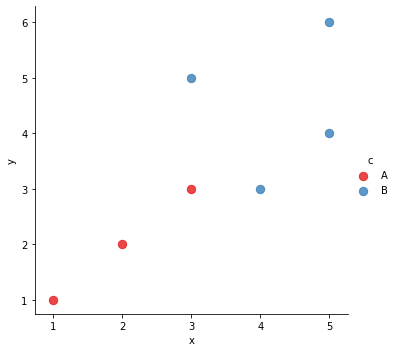

In [3]:
sns.lmplot('x', 'y', data=data,
    hue='c', palette='Set1',
    fit_reg=False, scatter_kws={'s': 70})
plt.show()

### 1.2 Calculating the Distance Between the Points

In [4]:
def l2_norm(p1, p2):
    p1 = np.array(p1).reshape(-1,1)
    p2 = np.array(p2).reshape(-1,1)
    d = p1 - p2
    return np.sqrt( d.transpose().dot(d)[0][0] )

### 1.3 Implementing KNN

In [5]:
#---our own KNN model---
def knn(training_points, test_point, k):
    distances = {}

#     #---the number of axes we are dealing with---
#     dimension = test_point.shape[1]

    #--calculating euclidean distance between each
    # point in the training data and test data
    for j in range(len(training_points)):
        
        dist = l2_norm(test_point, training_points.iloc[j,:-1])

        #---record the distance for each training points---
        distances[j] = dist

    #---sort the distances---
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
        
    #---to store the neighbors---
    neighbors = []

    #---extract the top k neighbors---
    for j in range(k):
        neighbors.append(sorted_d[j][0])

    #---for each neighbor found, find out its class---
    class_counter = {}

    for j in range(len(neighbors)):

        #---find out the class for that particular point---
        cls = training_points.iloc[neighbors[j],-1]

        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls] = 1

    #---sort the class_counter in descending order---
    sorted_counter = sorted(class_counter.items(),
                            key=operator.itemgetter(1), reverse=True)

    #---return the class with the most count, as well as the neighbors found---
    return(sorted_counter[0][0], neighbors)

### 1.4 Making Predictions

In [6]:
#---test point---
test_set = [[3,3.9]]
test = pd.DataFrame(test_set)
cls,neighbors = knn(data, test, 5)
print("Predicted Class: " + cls)

Predicted Class: B


### 1.5 Visualizing Different Values of K

k =  7
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
5  5  6  B
0  1  1  A
k =  5
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
k =  3
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
k =  1
Class A
Neighbors
   x  y  c
3  3  3  A


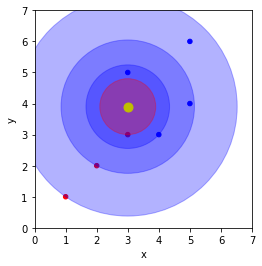

In [7]:
#---generate the color map for the scatter plot---
#---if column 'c' is A, then use Red, else use Blue---
colors = ['r' if i == 'A' else 'b' for i in data['c']]
ax = data.plot(kind='scatter', x='x', y='y', c = colors)
plt.xlim(0,7)
plt.ylim(0,7)

#---plot the test point---
plt.plot(test_set[0][0],test_set[0][1], "yo", markersize='9')

for k in range(7,0,-2):
    
    cls,neighbors = knn(data, test, k)

    print("============")
    print("k = ", k)
    print("Class", cls)
    print("Neighbors")
    print(data.iloc[neighbors])
    furthest_point = data.iloc[neighbors].tail(1)

    #---draw a circle connecting the test point
    # and the furthest point---
    radius = l2_norm(test, furthest_point.iloc[0,:-1])

    #---display the circle in red if classification is A,
    # else display circle in blue---
    c = 'r' if cls=='A' else 'b'
    circle = plt.Circle((test_set[0][0], test_set[0][1]),
                        radius, color=c, alpha=0.3)
    ax.add_patch(circle)
    plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Section 2
## Using Scikit-Learn’s KNeighborsClassifier Class for KNN

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # take the first two features
y = iris.target

#---plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

### 2.1 Exploring Different Values of K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def knn_analysis(X,y,k):
    
    #---instantiate learning model---
    knn = KNeighborsClassifier(n_neighbors=k)

    #---fitting the model---
    knn.fit(X, y)

    #---min and max for the first feature---
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    #---min and max for the second feature---
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #---step size in the mesh---
    h = (x_max / x_min)/100

    #---make predictions for each of the points in xx,yy---
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    #---draw the result using a color plot---
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

    #---plot the training points---
    colors = ['red', 'green', 'blue']
    for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'KNN (k={k})')
    plt.legend(loc='best', shadow=False, scatterpoints=1)

#     predictions = knn.predict(X)

#     #--classifications based on predictions---
#     print(np.unique(predictions, return_counts=True))

In [ ]:
knn_analysis(X,y,1)

In [ ]:
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

colors = ['red', 'green', 'blue']

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,7), sharey=True)

    
plt.sca(axes[0][0])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.ylabel('Sepal width')
plt.title(f'KNN (k=3)')
plt.legend(loc='best', shadow=False, scatterpoints=1)


plt.sca(axes[0][1])

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.title(f'KNN (k=7)')
plt.legend(loc='best', shadow=False, scatterpoints=1)


plt.sca(axes[1][0])

knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k=49)')
plt.legend(loc='best', shadow=False, scatterpoints=1)


plt.sca(axes[1][1])

knn = KNeighborsClassifier(n_neighbors=99)
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.title(f'KNN (k=99)')
plt.legend(loc='best', shadow=False, scatterpoints=1)

### 2.2 Parameter-Tuning K

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#---holds the cv (cross-validates) scores---
cv_scores = []

#---use all features---
X = iris.data[:, :4]
y = iris.target

#---number of folds---
folds = 10

#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds))))

#---remove all multiples of 3---
ks = [k for k in ks if k % 3 != 0]

#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)

    #---performs cross-validation and returns the average accuracy---
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    if k%20 == 0:
        print(k, mean)

### 2.3 Finding the Optimal K 

In [ ]:
#---calculate misclassification error for each k---
MSE = [1 - x for x in cv_scores]

#---determining best k (min. MSE)---
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

#---plot misclassification error vs k---
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
X = iris.data[:, :2]  # take the first two features
y = iris.target
knn_analysis(X,y,13)